In [86]:
#wrangle the data
import pandas as pd
import numpy as np

#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#play with words
import nltk.sentiment
import nltk
import re
from pprint import pprint

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import ToktokTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import 
from sklearn.feature_extraction.text import CountVectorizer

#sql creds
import env as e
import acquire as a
#scraping
import requests
from bs4 import BeautifulSoup

import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
from pprint import pprint
from urllib.parse import urljoin

start_page = 1
end_page = 20
base_url = "https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories"
links = []

# Iterate over each page
for page in range(start_page, end_page + 1):
    url = f"{base_url}&p={page}"
    headers = {"User-Agent": "Chrome/91.0.4472.124"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo_items = soup.find_all('li', class_='repo-list-item')
    for link in repo_items:
        relative_url = link.a.attrs['href']
        relative_url = relative_url.lstrip('/')  # Remove leading forward slash
        links.append(relative_url)

# Print all the links
for link in links:
    pprint(link)
    print()


'jtleek/datasharing'

'nightscout/cgm-remote-monitor'

'jwasham/coding-interview-university'

'rdpeng/ExData_Plotting1'

'CyC2018/CS-Notes'

'jackfrued/Python-100-Days'

'RedHatTraining/DO180-apps'

'ant-design/ant-design'

'donnemartin/system-design-primer'

'kubernetes/kubernetes'

'adam-p/markdown-here'

'fivethirtyeight/data'

'heroku/node-js-sample'

'Blankj/AndroidUtilCode'

'google/guava'

'openssl/openssl'

'square/okhttp'

'exacity/deeplearningbook-chinese'

'tesseract-ocr/tesseract'

'storybookjs/storybook'

'ohmyzsh/ohmyzsh'

'jenkins-docs/simple-java-maven-app'

'angular/angular'

'laravel/laravel'

'MicrosoftDocs/mslearn-tailspin-spacegame-web'

'ansible/ansible'

'elastic/elasticsearch'

'danielmiessler/SecLists'

'mmistakes/minimal-mistakes'

'redis/redis'

'FreeRDP/FreeRDP'

'labuladong/fucking-algorithm'

'996icu/996.ICU'

'othneildrew/Best-README-Template'

'huggingface/transformers'

'TheOdinProject/javascript-exercises'

'jquery/jquery'

'LarryMad/recipes'

'trustwa

In [3]:
len(links)

90

In [4]:
df = pd.read_json('data2.json')
df.head()

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...
3,kubernetes/kubernetes,Go,# Kubernetes (K8s)\n\n[![CII Best Practices](h...
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra..."


In [5]:
def tokenize(text):
    """
    Tokenizes the words in the input string.
    """
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

In [6]:
def clean(text: str) -> list: 
    """A simple function to cleanup text data"""
    
    #remove non-ascii characters & lower
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    #remove special characters
    words = re.sub(r'[^\w\s]', ' ', text).split()
    
    #build the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #getting all stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
#clean data
df['clean_contents'] = df.readme_contents.apply(tokenize).apply(' '.join)
df['clean_contents'] = df.clean_contents.apply(clean).apply(' '.join)

In [8]:
# create nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [9]:
#apply to dataframe
df['sentiment'] = df['clean_contents'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,repo,language,readme_contents,clean_contents,sentiment
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone need shar...,0.9979
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor k cgm remote monitor ni...,0.9999
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,python 100 8w 15 python core 50 course http gi...,0.9834
3,kubernetes/kubernetes,Go,# Kubernetes (K8s)\n\n[![CII Best Practices](h...,kubernetes k8s cii best practice http bestprac...,0.9888
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra...",img src framework doc src doc spring framework...,0.4215


In [10]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df['clean_contents'].str.len()
# we apply our clean function, apply len chained on it

# if we did not want to clean this before word count, we would want to do a split on it

df['word_count'] = df.clean_contents.apply(clean).apply(len)

In [11]:
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone need shar...,0.9979,8385,1231
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor k cgm remote monitor ni...,0.9999,40741,5701
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,python 100 8w 15 python core 50 course http gi...,0.9834,6136,1170
3,kubernetes/kubernetes,Go,# Kubernetes (K8s)\n\n[![CII Best Practices](h...,kubernetes k8s cii best practice http bestprac...,0.9888,3411,461
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra...",img src framework doc src doc spring framework...,0.4215,2440,350


In [12]:
df.language.describe()

count             63
unique            17
top       JavaScript
freq              15
Name: language, dtype: object

In [13]:
df.language.mode()

0    JavaScript
Name: language, dtype: object

In [14]:
15/63

0.23809523809523808

In [15]:
df.language.value_counts()

JavaScript    15
Python        10
Java           5
HTML           5
Go             4
Shell          4
TypeScript     3
CSS            3
Dart           2
PHP            2
Dockerfile     2
C#             2
C              2
C++            1
Scala          1
Rust           1
SCSS           1
Name: language, dtype: int64

In [16]:
df.language = df.language.fillna('none')

In [17]:
languages_to_keep = ['JavaScript', 'Python', 'Java']
df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

In [18]:
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,jtleek/datasharing,Other,How to share data with a statistician\n=======...,share data statistician guide anyone need shar...,0.9979,8385,1231
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor k cgm remote monitor ni...,0.9999,40741,5701
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,python 100 8w 15 python core 50 course http gi...,0.9834,6136,1170
3,kubernetes/kubernetes,Other,# Kubernetes (K8s)\n\n[![CII Best Practices](h...,kubernetes k8s cii best practice http bestprac...,0.9888,3411,461
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra...",img src framework doc src doc spring framework...,0.4215,2440,350


In [19]:
df.language.describe()

count        70
unique        4
top       Other
freq         40
Name: language, dtype: object

# Exploration

In [26]:
def split_data(df, variable):
    '''
    take in a DataFrame and target variable. return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.20, random_state=123, stratify=df[variable])
    
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123,
                                      stratify = train_validate[variable])
    return train, validate, test

In [27]:
train, validate, test = split_data(df, 'language')
train.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
19,flutter/flutter,Other,"<a href=""https://flutter.dev/"">\n <h1 align=""...",href http flutter dev h1 align center picture ...,0.997,5506,800
53,ansible/ansible,Python,|PyPI version| |Docs badge| |Chat badge| |Buil...,124 pypi version 124 124 doc badge 124 124 cha...,0.996,4522,661
52,home-assistant/core,Python,Home Assistant |Chat Status|\n================...,home assistant 124 chat status 124 open source...,0.959,1350,197
16,mdn/learning-area,Other,# learning-area\nGitHub repo for the [MDN Lear...,learning area github repo mdn learning area ht...,0.000,421,64
35,linuxacademy/devops-essentials-sample-app,Other,# devops-essentials-sample-app\n\nThis is a si...,devops essential sample app simple sample appl...,0.000,98,13


In [28]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

JavaScript_words = clean(' '.join(train[train.language=='JavaScript']['clean_contents']))
Python_words = clean(' '.join(train[train.language=='Python']['clean_contents']))
Java_words = clean(' '.join(train[train.language=='Java']['clean_contents']))
Other_words = clean(' '.join(train[train.language=='Other']['clean_contents']))
all_words = clean(' '.join(train['clean_contents']))

In [29]:
#check it out
JavaScript_words

['lessontitle',
 'introduccin',
 'permalink',
 'index',
 'html',
 'layout',
 'intro',
 'eleventynavigation',
 'key',
 'intro',
 'order',
 '0',
 'logo',
 'logo',
 'png',
 'http',
 '30secondsofcode',
 'org',
 'j',
 'p',
 '1',
 '30',
 'second',
 'code',
 'short',
 'javascript',
 'code',
 'snippet',
 'development',
 'need',
 'visit',
 'website',
 'http',
 '30secondsofcode',
 'org',
 'view',
 'snippet',
 'collection',
 'search',
 'snippet',
 'suit',
 'need',
 'search',
 'name',
 'tag',
 'language',
 'using',
 'snippet',
 'description',
 'start',
 'typing',
 'term',
 'see',
 'come',
 'browse',
 'snippet',
 'http',
 '30secondsofcode',
 'org',
 'snippet',
 'p',
 '1',
 'individual',
 'snippet',
 'collection',
 'http',
 '30secondsofcode',
 'org',
 'collection',
 'p',
 '1',
 'topic',
 'click',
 'snippet',
 'card',
 'view',
 'whole',
 'snippet',
 'including',
 'code',
 'explanation',
 'example',
 'copy',
 'code',
 'block',
 'snippet',
 'card',
 'using',
 'copy',
 'button',
 'top',
 'right',
 'like

In [30]:
#check it out
Python_words

['124',
 'pypi',
 'version',
 '124',
 '124',
 'doc',
 'badge',
 '124',
 '124',
 'chat',
 'badge',
 '124',
 '124',
 'build',
 'status',
 '124',
 '124',
 'code',
 'conduct',
 '124',
 '124',
 'mailing',
 'list',
 '124',
 '124',
 'license',
 '124',
 '124',
 'cii',
 'best',
 'practice',
 '124',
 'ansible',
 'ansible',
 'radically',
 'simple',
 'automation',
 'system',
 'handle',
 'configuration',
 'management',
 'application',
 'deployment',
 'cloud',
 'provisioning',
 'ad',
 'hoc',
 'task',
 'execution',
 'network',
 'automation',
 'multi',
 'node',
 'orchestration',
 'ansible',
 'make',
 'complex',
 'change',
 'like',
 'zero',
 'downtime',
 'rolling',
 'update',
 'load',
 'balancer',
 'easy',
 'information',
 'ansible',
 'website',
 'http',
 'ansible',
 'com',
 '_',
 'design',
 'principle',
 'extremely',
 'simple',
 'setup',
 'process',
 'minimal',
 'learning',
 'curve',
 'manage',
 'machine',
 'quickly',
 'parallel',
 'avoid',
 'custom',
 'agent',
 'additional',
 'open',
 'port',
 'agent

In [31]:
#check it out
Java_words

['apache',
 'dubbo',
 'project',
 'build',
 'test',
 'pr',
 'http',
 'github',
 'com',
 'apache',
 'dubbo',
 'action',
 'workflow',
 'build',
 'test',
 'pr',
 'yml',
 'badge',
 'svg',
 'http',
 'github',
 'com',
 'apache',
 'dubbo',
 'action',
 'workflow',
 'build',
 'test',
 'pr',
 'yml',
 'codecov',
 'http',
 'codecov',
 'io',
 'gh',
 'apache',
 'dubbo',
 'branch',
 '3',
 '2',
 'graph',
 'badge',
 'svg',
 'http',
 'codecov',
 'io',
 'gh',
 'apache',
 'dubbo',
 'maven',
 'http',
 'img',
 'shield',
 'io',
 'maven',
 'central',
 'v',
 'org',
 'apache',
 'dubbo',
 'dubbo',
 'svg',
 'license',
 'http',
 'img',
 'shield',
 'io',
 'github',
 'license',
 'alibaba',
 'dubbo',
 'svg',
 'average',
 'time',
 'resolve',
 'issue',
 'http',
 'isitmaintained',
 'com',
 'badge',
 'resolution',
 'apache',
 'dubbo',
 'svg',
 'http',
 'isitmaintained',
 'com',
 'project',
 'apache',
 'dubbo',
 'average',
 'time',
 'resolve',
 'issue',
 'percentage',
 'issue',
 'still',
 'open',
 'http',
 'isitmaintained

In [32]:
#check it out
Other_words

['href',
 'http',
 'flutter',
 'dev',
 'h1',
 'align',
 'center',
 'picture',
 'source',
 'medium',
 'prefers',
 'color',
 'scheme',
 'dark',
 'srcset',
 'http',
 'storage',
 'googleapis',
 'com',
 'cm',
 'storage',
 'bucket',
 '6e19fee6b47b36ca613f',
 'png',
 'img',
 'alt',
 'flutter',
 'src',
 'http',
 'storage',
 'googleapis',
 'com',
 'cm',
 'storage',
 'bucket',
 'c823e53b3a1a7b0d36a9',
 'png',
 'picture',
 'h1',
 'build',
 'status',
 'cirrus',
 'build',
 'status',
 'discord',
 'badge',
 'discord',
 'instruction',
 'twitter',
 'handle',
 'twitter',
 'badge',
 'codecov',
 'http',
 'codecov',
 'io',
 'gh',
 'flutter',
 'flutter',
 'branch',
 'master',
 'graph',
 'badge',
 'svg',
 'token',
 '11ydrju2m2',
 'http',
 'codecov',
 'io',
 'gh',
 'flutter',
 'flutter',
 'cii',
 'best',
 'practice',
 'http',
 'bestpractices',
 'coreinfrastructure',
 'org',
 'project',
 '5631',
 'badge',
 'http',
 'bestpractices',
 'coreinfrastructure',
 'org',
 'project',
 '5631',
 'openssf',
 'scorecard',
 

In [33]:
#check it out
all_words

['href',
 'http',
 'flutter',
 'dev',
 'h1',
 'align',
 'center',
 'picture',
 'source',
 'medium',
 'prefers',
 'color',
 'scheme',
 'dark',
 'srcset',
 'http',
 'storage',
 'googleapis',
 'com',
 'cm',
 'storage',
 'bucket',
 '6e19fee6b47b36ca613f',
 'png',
 'img',
 'alt',
 'flutter',
 'src',
 'http',
 'storage',
 'googleapis',
 'com',
 'cm',
 'storage',
 'bucket',
 'c823e53b3a1a7b0d36a9',
 'png',
 'picture',
 'h1',
 'build',
 'status',
 'cirrus',
 'build',
 'status',
 'discord',
 'badge',
 'discord',
 'instruction',
 'twitter',
 'handle',
 'twitter',
 'badge',
 'codecov',
 'http',
 'codecov',
 'io',
 'gh',
 'flutter',
 'flutter',
 'branch',
 'master',
 'graph',
 'badge',
 'svg',
 'token',
 '11ydrju2m2',
 'http',
 'codecov',
 'io',
 'gh',
 'flutter',
 'flutter',
 'cii',
 'best',
 'practice',
 'http',
 'bestpractices',
 'coreinfrastructure',
 'org',
 'project',
 '5631',
 'badge',
 'http',
 'bestpractices',
 'coreinfrastructure',
 'org',
 'project',
 '5631',
 'openssf',
 'scorecard',
 

In [34]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

JavaScript_words_freq = pd.Series(JavaScript_words).value_counts()
Python_words_freq = pd.Series(Python_words).value_counts()
Java_words_freq = pd.Series(Java_words).value_counts()
Other_words_freq = pd.Series(Other_words).value_counts()
all_words_freq = pd.Series(all_words).value_counts()

In [35]:
#check it out
JavaScript_words_freq

http           1040
com             925
javascript      827
name            715
const           600
               ... 
openjsf           1
kamat             1
trivikram         1
theratliter       1
lessontitle       1
Length: 3060, dtype: int64

In [36]:
#check it out
Python_words_freq

http         489
com          434
nbsp         314
github       225
4            177
            ... 
devops         1
ruby           1
matlab         1
sredevops      1
thank          1
Length: 1659, dtype: int64

In [37]:
#check it out
Java_words_freq

dubbo          276
apache         168
http           162
com            103
github          98
              ... 
developed        1
across           1
reuse            1
portability      1
complex          1
Length: 543, dtype: int64

In [38]:
#check it out
Other_words_freq

http            592
com             358
github          277
124             183
flutter         140
               ... 
intelligence      1
collective        1
benefit           1
hope              1
truckload         1
Length: 3014, dtype: int64

In [39]:
#check it out
all_words_freq

http          2283
com           1820
github        1171
javascript     834
name           750
              ... 
nikeplus         1
primeros         1
ryan             1
concern          1
rust             1
Length: 6134, dtype: int64

In [40]:
pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq, Other_words_freq, all_words_freq], axis=1).fillna(0).astype(int)

,0,1,2,3,4
http,1040,489,162,592,2283
com,925,434,103,358,1820
javascript,827,1,1,5,834
name,715,1,6,28,750
const,600,0,0,5,605
...,...,...,...,...,...
intelligence,0,0,0,1,1
collective,0,0,0,1,1
benefit,0,0,0,1,1
hope,0,0,0,1,1


In [41]:
# lets combine all 5 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq, Other_words_freq, all_words_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['JavaScript','Python','Java', 'Other','All']

word_counts.head()

,JavaScript,Python,Java,Other,All
http,1040,489,162,592,2283
com,925,434,103,358,1820
javascript,827,1,1,5,834
name,715,1,6,28,750
const,600,0,0,5,605


In [42]:
word_counts.sort_values('All', ascending=False)

,JavaScript,Python,Java,Other,All
http,1040,489,162,592,2283
com,925,434,103,358,1820
github,571,225,98,277,1171
javascript,827,1,1,5,834
name,715,1,6,28,750
...,...,...,...,...,...
eased,0,1,0,0,1
domension,0,1,0,0,1
matrix,0,1,0,0,1
sketch,0,1,0,0,1


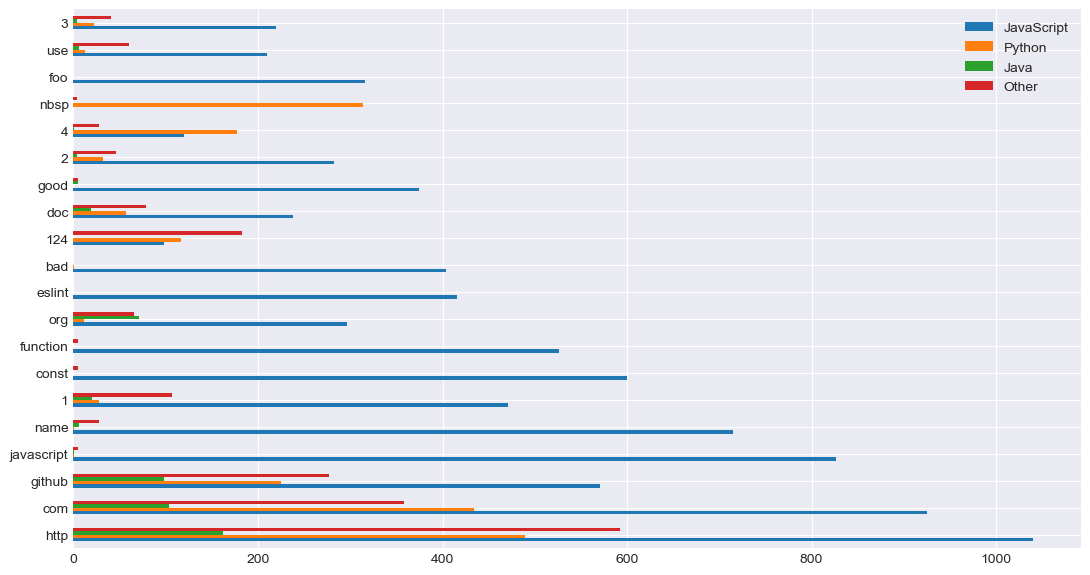

In [43]:
#visualize
word_counts.sort_values('All', ascending=False)[['JavaScript','Python','Java', 'Other']].head(20).plot.barh()
plt.show()

In [44]:
word_counts.sort_values('All', ascending=False).head(20)\
.apply(lambda row: row/row['All'], axis=1)

,JavaScript,Python,Java,Other,All
http,0.455541,0.214192,0.070959,0.259308,1.0
com,0.508242,0.238462,0.056593,0.196703,1.0
github,0.487617,0.192143,0.083689,0.236550,1.0
javascript,0.991607,0.001199,0.001199,0.005995,1.0
name,0.953333,0.001333,0.008000,0.037333,1.0
1,0.752396,0.044728,0.031949,0.170927,1.0
const,0.991736,0.000000,0.000000,0.008264,1.0
function,0.990584,0.000000,0.000000,0.009416,1.0
org,0.666667,0.024775,0.159910,0.148649,1.0
eslint,1.000000,0.000000,0.000000,0.000000,1.0


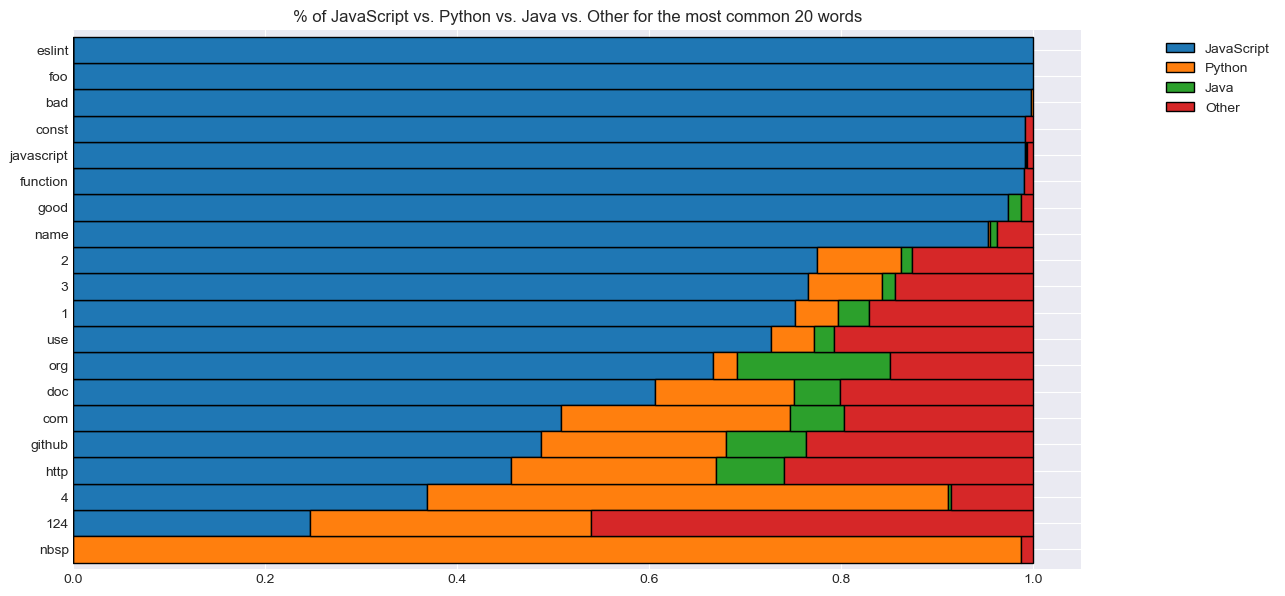

In [45]:
(word_counts.sort_values('All', ascending=False)
.head(20)
.apply(lambda row: row/row['All'], axis = 1)
.drop(columns='All')
.sort_values(by='JavaScript')
.plot.barh(stacked=True, width=1, ec='black')
)

plt.title('% of JavaScript vs. Python vs. Java vs. Other for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

# Word Clouds

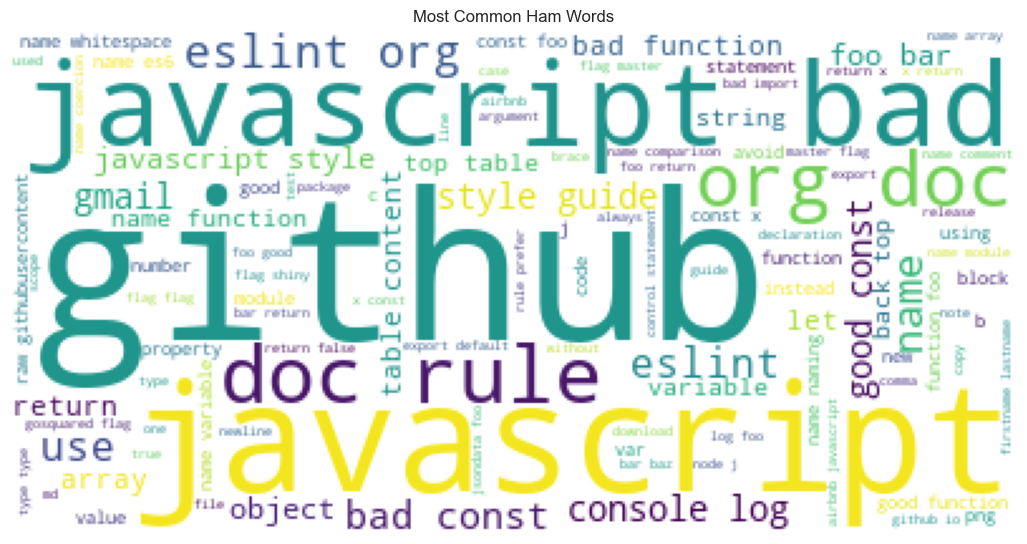

In [46]:
# Javascript word cloud
img = WordCloud(background_color='white').generate(' '.join(JavaScript_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

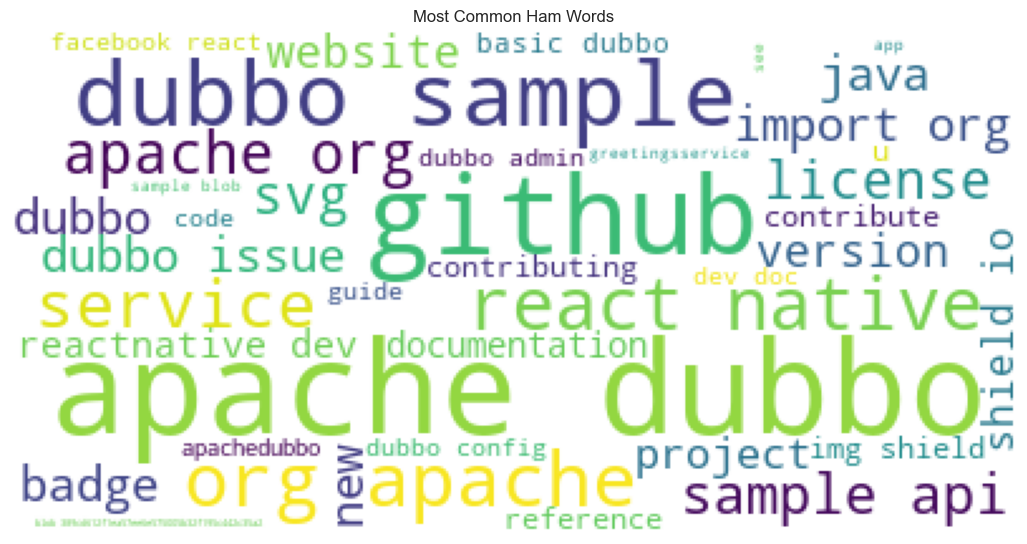

In [47]:
# Java word cloud
img = WordCloud(background_color='white').generate(' '.join(Java_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

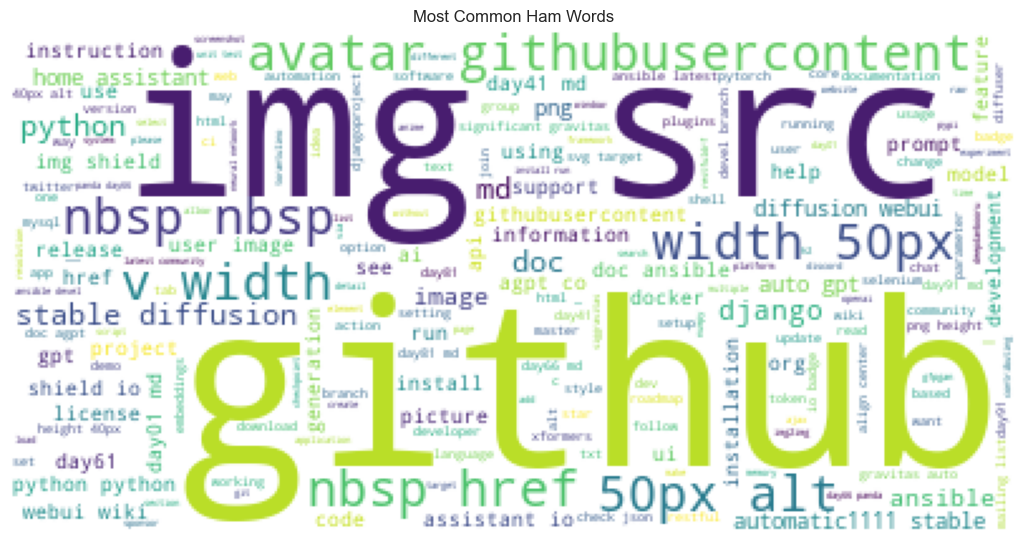

In [48]:
# Python word cloud
img = WordCloud(background_color='white').generate(' '.join(Python_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

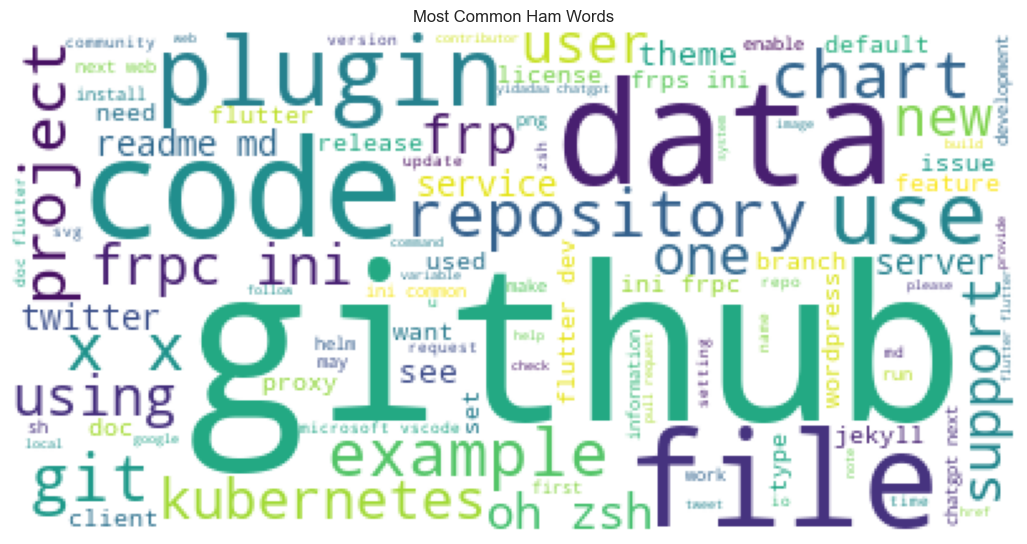

In [49]:
# Other word cloud
img = WordCloud(background_color='white').generate(' '.join(Other_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

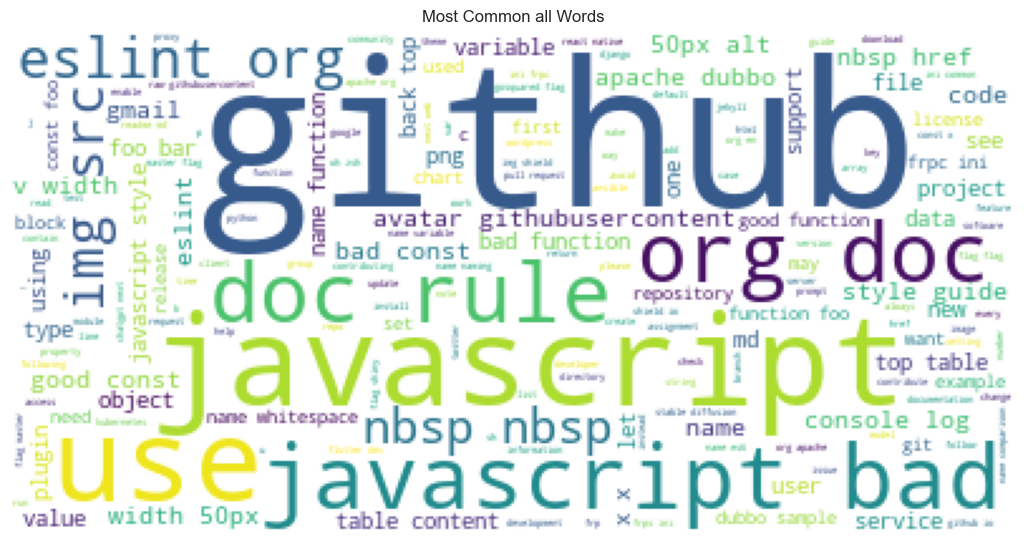

In [50]:
# All word cloud
img = WordCloud(background_color='white').generate(' '.join(all_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common all Words')
plt.show()

# Sentiment analysis

In [51]:
# is the mean and median values of sentiment score different for categories?

train.groupby('language').sentiment.agg(['mean','median'])

,mean,median
language,,
Java,0.996833,0.99690
JavaScript,0.480156,0.77400
Other,0.768796,0.99220
Python,0.983733,0.98805


In [52]:
train.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
19,flutter/flutter,Other,"<a href=""https://flutter.dev/"">\n <h1 align=""...",href http flutter dev h1 align center picture ...,0.997,5506,800
53,ansible/ansible,Python,|PyPI version| |Docs badge| |Chat badge| |Buil...,124 pypi version 124 124 doc badge 124 124 cha...,0.996,4522,661
52,home-assistant/core,Python,Home Assistant |Chat Status|\n================...,home assistant 124 chat status 124 open source...,0.959,1350,197
16,mdn/learning-area,Other,# learning-area\nGitHub repo for the [MDN Lear...,learning area github repo mdn learning area ht...,0.000,421,64
35,linuxacademy/devops-essentials-sample-app,Other,# devops-essentials-sample-app\n\nThis is a si...,devops essential sample app simple sample appl...,0.000,98,13


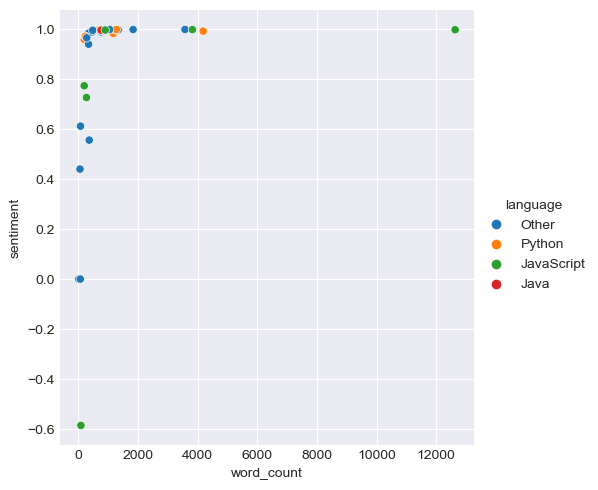

In [53]:
#plot message_length vs sentiment and hue by label

sns.relplot(data=train, x='word_count', y='sentiment', hue='language');

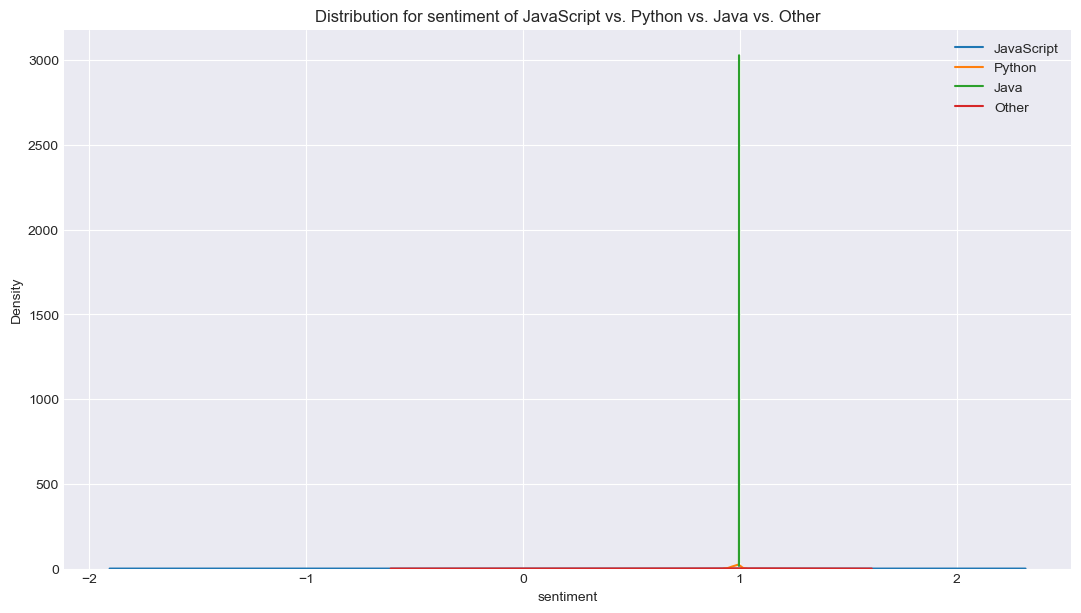

In [61]:
# is the distribution for sentiment 

sns.kdeplot(train[train.language=='JavaScript'].sentiment, label='JavaScript')
sns.kdeplot(train[train.language=='Python'].sentiment, label='Python')
sns.kdeplot(train[train.language=='Java'].sentiment, label='Java')
sns.kdeplot(train[train.language=='Other'].sentiment, label='Other')

plt.legend(['JavaScript', 'Python', 'Java','Other'])
plt.title("Distribution for sentiment of JavaScript vs. Python vs. Java vs. Other")
plt.show()

# Modeling

In [62]:
#make X_train, X_validate, X_test, y_train, y_validate, y_test
X_train = train.clean_contents
X_validate = validate.clean_contents
X_test = test.clean_contents
y_train = train.language
y_validate = validate.language
y_test = test.language

In [72]:
#make my bag of words
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)
X_test_bow = cv.transform(X_test)

In [74]:
X_bow

<42x6112 sparse matrix of type '<class 'numpy.int64'>'
	with 14458 stored elements in Compressed Sparse Row format>

In [ ]:
y_train.head()

## Decision Tree

In [79]:
def decision_tree(X_bow, X_validate_bow, y_train, y_validate):
    """
    This function trains a decision tree classifier on the provided training data, and evaluates its performance on the
    validation data for different values of the 'max_depth' hyperparameter. It then generates a plot of the training and
    validation accuracy scores as a function of 'max_depth', and returns a DataFrame containing these scores.

    Parameters:
    - X_train (pandas.DataFrame): A DataFrame containing the features for the training data.
    - X_validate (pandas.DataFrame): A DataFrame containing the features for the validation data.
    - y_train (pandas.Series): A Series containing the target variable for the training data.
    - y_validate (pandas.Series): A Series containing the target variable for the validation data.

    Returns:
    - scores_df (pandas.DataFrame): A DataFrame containing the training and validation accuracy scores, as well as the
      difference between them, for different values of the 'max_depth' hyperparameter.
    """
    # get data
    scores_all = []
    for x in range(1,20):
        tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    
        tree.fit(X_bow, y_train)
        train_acc = tree.score(X_bow,y_train)
        val_acc = tree.score(X_validate_bow, y_validate)
        score_diff = train_acc - val_acc
        scores_all.append([x, train_acc, val_acc, score_diff])
    
    scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc','val_acc','score_diff'])
    
    # Plot the results
    sns.set_style('whitegrid')
    plt.plot(scores_df['max_depth'], scores_df['train_acc'], label='Train score')
    plt.plot(scores_df['max_depth'], scores_df['val_acc'], label='Validation score')
    plt.fill_between(scores_df['max_depth'], scores_df['train_acc'], scores_df['val_acc'], alpha=0.2, color='gray')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Max Depth')
    plt.legend()
    plt.show()

    return scores_df

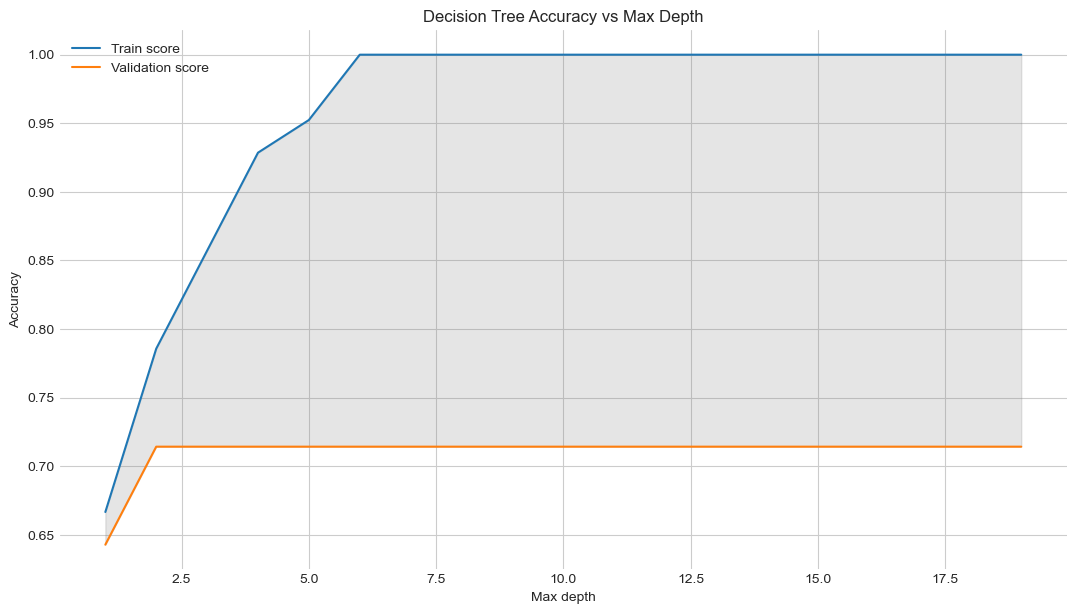

,max_depth,train_acc,val_acc,score_diff
0,1,0.666667,0.642857,0.023810
1,2,0.785714,0.714286,0.071429
2,3,0.857143,0.714286,0.142857
3,4,0.928571,0.714286,0.214286
4,5,0.952381,0.714286,0.238095
5,6,1.000000,0.714286,0.285714
6,7,1.000000,0.714286,0.285714
7,8,1.000000,0.714286,0.285714
8,9,1.000000,0.714286,0.285714
9,10,1.000000,0.714286,0.285714


In [80]:
#run the model
decision_tree(X_bow, X_validate_bow, y_train, y_validate)

## Random Forest

In [84]:
def random_forest_scores(X_bow, y_train, X_validate_bow, y_validate):
    """
    Trains and evaluates a random forest classifier with different combinations of hyperparameters. The function takes in 
    training and validation datasets, and returns a dataframe summarizing the model performance on each combination of 
    hyperparameters.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Features of the training dataset.
    y_train : pandas Series
        Target variable of the training dataset.
    X_validate : pandas DataFrame
        Features of the validation dataset.
    y_validate : pandas Series
        Target variable of the validation dataset.

    Returns:
    --------
    df : pandas DataFrame
        A dataframe summarizing the model performance on each combination of hyperparameters.
    """
    #define variables
    train_scores = []
    validate_scores = []
    min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
    max_depth_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    
    
    for min_samples_leaf, max_depth in zip(min_samples_leaf_values, max_depth_values):
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth,random_state=123)
        rf.fit(X_bow, y_train)
        train_score = rf.score(X_bow, y_train)
        validate_score = rf.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        validate_scores.append(validate_score)
       
    # Calculate the difference between the train and validation scores
    diff_scores = [train_score - validate_score for train_score, validate_score in zip(train_scores, validate_scores)]
    
    #Put results into a dataframe
    df = pd.DataFrame({
        'min_samples_leaf': min_samples_leaf_values,
        'max_depth': max_depth_values,
        'train_score': train_scores,
        'validate_score': validate_scores,
        'diff_score': diff_scores})
     
    # Set plot style
    sns.set_style('whitegrid')
 
    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(max_depth_values, train_scores, label='train', marker='o', color='blue')
    plt.plot(max_depth_values, validate_scores, label='validation', marker='o', color='orange')
    plt.fill_between(max_depth_values, train_scores, validate_scores, alpha=0.2, color='gray')
    plt.xticks([2,4,6,8,10],['Leaf 9 and Depth 2','Leaf 7 and Depth 4','Leaf 5 and Depth 6','Leaf 3 and Depth 8','Leaf 1and Depth 10'], rotation = 45)
    plt.xlabel('min_samples_leaf and max_depth', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Random Forest Classifier Performance', fontsize=18)
    plt.legend(fontsize=12)
    plt.show()
    
    return df

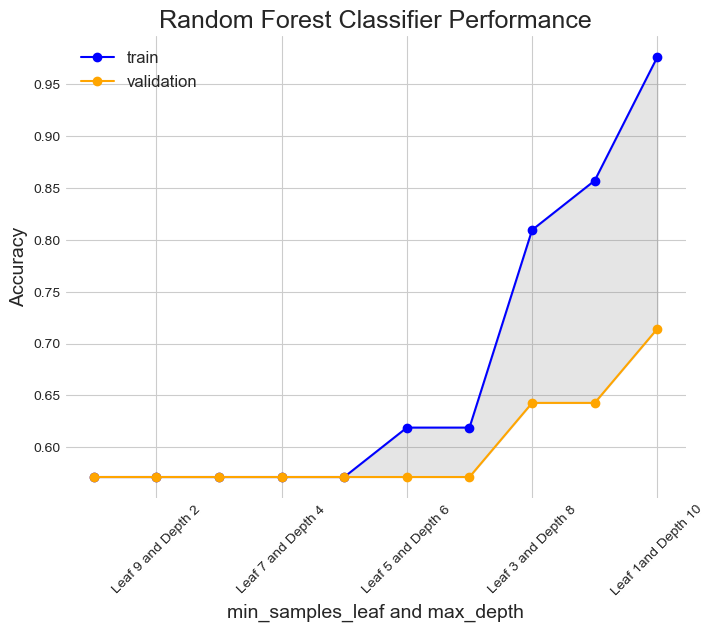

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.976190,0.714286,0.261905
1,2,9,0.857143,0.642857,0.214286
2,3,8,0.809524,0.642857,0.166667
3,4,7,0.619048,0.571429,0.047619
4,5,6,0.619048,0.571429,0.047619
5,6,5,0.571429,0.571429,0.000000
6,7,4,0.571429,0.571429,0.000000
7,8,3,0.571429,0.571429,0.000000
8,9,2,0.571429,0.571429,0.000000
9,10,1,0.571429,0.571429,0.000000


In [85]:
# run random forest
random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

## KNN

In [75]:
def k_nearest2(X_bow, y_train, X_validate_bow, y_validate):
    """
    Trains and evaluates KNN models for different values of k and plots the results.

    Parameters:
    -----------
    X_train: array-like, shape (n_samples, n_features)
        Training input samples.
    y_train: array-like, shape (n_samples,)
        Target values for the training input samples.
    X_validate: array-like, shape (n_samples, n_features)
        Validation input samples.
    y_validate: array-like, shape (n_samples,)
        Target values for the validation input samples.

    Returns:
    --------
    results: pandas DataFrame
        Contains the train and validation accuracy for each value of k.
    """
    metrics = []
    train_score = []
    validate_score = []
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_bow, y_train)
        train_score.append(knn.score(X_bow, y_train))
        validate_score.append(knn.score(X_validate_bow, y_validate))
        diff_score = train_score[-1] - validate_score[-1]
        metrics.append({'k': k, 'train_score': train_score[-1], 'validate_score': validate_score[-1], 'diff_score': diff_score})

    baseline_accuracy = (y_train == 6).mean()

    results = pd.DataFrame.from_records(metrics)

    # modify the last few lines of the function
    # drop the diff_score column before plotting
    results_for_plotting = results.drop(columns=['diff_score'])
    with sns.axes_style('whitegrid'):
        ax = results_for_plotting.set_index('k').plot(figsize=(16,9))
    plt.ylabel('Accuracy')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xticks(np.arange(0,21,1))   
    min_diff_idx = np.abs(results['diff_score']).argmin()
    min_diff_k = results.loc[min_diff_idx, 'k']
    min_diff_score = results.loc[min_diff_idx, 'diff_score']
    ax.axvline(min_diff_k, linestyle='--', linewidth=2, color='red', label=f'min diff at k={min_diff_k} (diff={min_diff_score:.3f})')
    plt.fill_between(results['k'], train_score, validate_score, alpha=0.2, color='gray', where=(results['k'] > 0))    
    plt.title('K Nearest Neighbor', fontsize=18)
    plt.legend()
    plt.show()
    
    return results

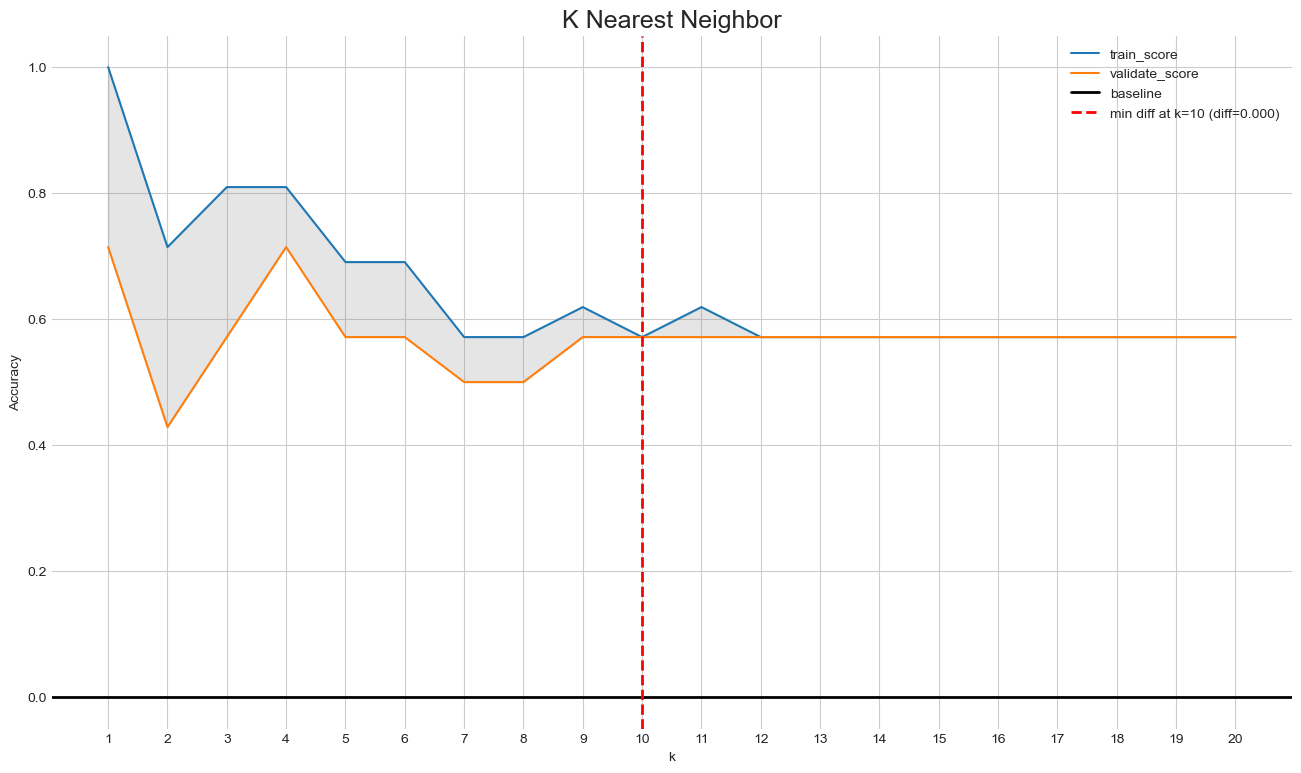

,k,train_score,validate_score,diff_score
0,1,1.000000,0.714286,0.285714
1,2,0.714286,0.428571,0.285714
2,3,0.809524,0.571429,0.238095
3,4,0.809524,0.714286,0.095238
4,5,0.690476,0.571429,0.119048
5,6,0.690476,0.571429,0.119048
6,7,0.571429,0.500000,0.071429
7,8,0.571429,0.500000,0.071429
8,9,0.619048,0.571429,0.047619
9,10,0.571429,0.571429,0.000000


In [78]:
# run knn
k_nearest2(X_bow, y_train, X_validate_bow, y_validate)

## Logistic Regression

In [87]:
def plot_logistic_regression(X_bow, X_validate_bow, y_train, y_validate):
    '''
    Trains multiple logistic regression models with different regularization strengths (C) on the given training
    data, and plots the resulting train and validation scores against C values. The optimal value of C is marked
    by a vertical red dashed line, and the associated difference between the train and validation scores is shown
    in the plot legend.

    Parameters:
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    X_validate : array-like of shape (n_samples, n_features)
        The validation input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.
    y_validate : array-like of shape (n_samples,)
        The target values for validation.

    Returns:
    df1 : pandas DataFrame
        A table containing the C, train_score, validate_score, and diff_score values for each model.
    '''
    train_scores = []
    val_scores = []
    c_values = [.01, .1, 1, 10 , 100, 1000]
    for c in c_values:
        logit = LogisticRegression(C=c, random_state=123)
        logit.fit(X_bow, y_train)
        train_score = logit.score(X_bow, y_train)
        val_score = logit.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        val_scores.append(val_score)
    
    # Calculate the difference between the train and validation scores
    diff_scores = [train_score - val_score for train_score, val_score in zip(train_scores, val_scores)]
     
    # Put results into a list of tuples
    results = list(zip(c_values, train_scores, val_scores, diff_scores))
    # Convert the list of tuples to a Pandas DataFrame
    df1 = pd.DataFrame(results, columns=['C', 'train_score', 'validate_score', 'diff_score'])
    

    # Plot the results
    plt.plot(c_values, train_scores, label='Train score')
    plt.plot(c_values, val_scores, label='Validation score')
    min_diff_idx = np.abs(diff_scores).argmin()
    min_diff_c = results[min_diff_idx][0]
    min_diff_score = results[min_diff_idx][3]
    plt.axvline(min_diff_c, linestyle='--', linewidth=2, color='red', label=f'min diff at C={min_diff_c} (diff={min_diff_score:.3f})')
    plt.fill_between(c_values, train_scores, val_scores, alpha=0.2, color='gray')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression Accuracy vs C')
    plt.legend()
    plt.show()

    return df1

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

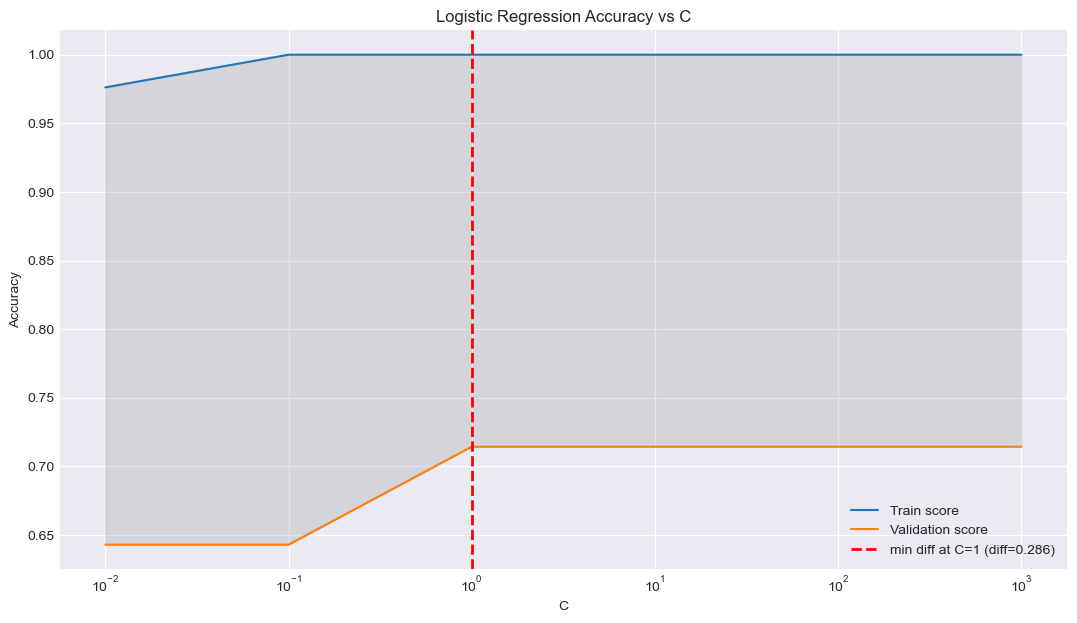

,C,train_score,validate_score,diff_score
0,0.01,0.97619,0.642857,0.333333
1,0.10,1.00000,0.642857,0.357143
2,1.00,1.00000,0.714286,0.285714
3,10.00,1.00000,0.714286,0.285714
4,100.00,1.00000,0.714286,0.285714
5,1000.00,1.00000,0.714286,0.285714


In [88]:
# run logistic regression model
plot_logistic_regression(X_bow, X_validate_bow, y_train, y_validate)